In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# 表示の幅を広げる
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
rcParams['figure.figsize'] = 10, 10 # グラフが見きれないようにするためサイズを大きくしておく

# 住宅情報(2015年)

In [7]:
!pip install mojimoji
import mojimoji

In [8]:
kokuzei0 = pd.read_csv('2015国政調査・小地域集計.csv', low_memory=False)
kokuzei0 = kokuzei0[kokuzei0["市区町村名"].str.endswith('区')]
    
# "丁"を削除し数値のみにする
new = kokuzei0['字・丁目名'] .str.split("丁", n = 1, expand = True) 

# 欠損値を0に置換
new.fillna({0:0}, inplace=True) 
kokuzei0["字・丁目名"] = new[0]

# int型をstr型に変換し、全角数字を半角数字にする
kokuzei0['字・丁目名'] = kokuzei0['字・丁目名'].astype('str')
kokuzei0['字・丁目名'] = kokuzei0["字・丁目名"].apply(mojimoji.zen_to_han)
# 必要な項目のみ抽出
on = ["都道府県名","市区町村名","大字・町名","字・丁目名","一般世帯総数（住居の種類・住宅の所有の関係）","住宅に住む一般世帯","主世帯","持ち家",
      "民営の借家","給与住宅","住宅に住む一般世帯.1","主世帯.1","持ち家.1"]
kokuzei2 = kokuzei0[on]

In [9]:
kokuzei2[kokuzei2["市区町村名"] == "渋谷区"].head()

,都道府県名,市区町村名,大字・町名,字・丁目名,一般世帯総数（住居の種類・住宅の所有の関係）,住宅に住む一般世帯,主世帯,持ち家,民営の借家,給与住宅,住宅に住む一般世帯.1,主世帯.1,持ち家.1
2031,東京都,渋谷区,NaN,0,135520,133540,131894,55856,68024,4804,219888,217194,111550
2032,東京都,渋谷区,恵比寿,0,9936,9772,9685,3931,5468,277,15144,14997,7502
2033,東京都,渋谷区,恵比寿,1,2471,2465,2439,985,1398,56,3736,3701,1823
2034,東京都,渋谷区,恵比寿,2,2817,2707,2690,1038,1575,77,4182,4146,1949
2035,東京都,渋谷区,恵比寿,3,2769,2751,2715,1124,1503,79,4397,4331,2338


# 世帯所得情報（2015）

In [10]:
TYO_income = pd.read_csv('東京都世帯収入2015.csv', low_memory=False) #from e-stat
TYO_income.rename(columns={'市区町村':'市区町村名'}, inplace = True) #ラベル名変更

In [11]:
TYO_income.head()

,ID,県,市区町村名,普通世帯総数,25歳未満,25〜34歳,35〜44,45〜54,55〜64,65歳以上,自営業主,農林・漁業業主,商工・その他の業主,雇用者,会社・団体・公社又は個人に雇われている者,官公庁,労働者派遣事業所の派遣社員,パート・アルバイト・その他,無職,学生,その他,300万円未満,300〜500,500〜700,700〜1000,1000万円以上
0,100,東京都,特別区部,4613570,160940,548720,736050,712320,649570,1240920,370710,2920,367790,1494560,1102490,83290,57170,251610,623290,36500,586790,1336500,1105980,664560,521910,439290
1,101,東京都,千代田区,27590,530,4640,4720,4610,4460,6850,3050,0,3050,8390,5370,2400,130,480,2370,210,2160,3540,5290,5950,4910,6170
2,102,東京都,中央区,76170,2170,13110,16270,15270,10320,15060,6390,60,6340,27950,23600,1320,630,2400,6370,210,6170,13750,17490,13430,12460,15320
3,103,東京都,港区,111380,2150,12950,21420,18260,15280,28870,7850,70,7780,23040,18220,1400,480,2940,8340,340,8010,18700,19050,15420,19660,26310
4,104,東京都,新宿区,195350,11590,24890,31780,28620,23600,48750,12050,120,11930,46460,32660,4750,1360,7690,22760,2460,20300,57820,43440,27350,21100,21120


# 高級住宅街のリスト

In [12]:
dff = pd.read_csv('エリア(区)ごとの買取総額 - 高級持ち家エリア.csv', low_memory=False)
dff["市区町村名"] = dff["市区町村名"] + "区"

# 必要な要素のみ抽出
on = ["市区町村名","大字・町名","字・丁目名"]
rich_nbhd = dff[on]

# 欠損値の補完
rich_nbhd.fillna({'字・丁目名':0}, inplace=True)
rich_nbhd["字・丁目名"] = rich_nbhd["字・丁目名"].astype(int)
rich_nbhd["字・丁目名"] = rich_nbhd["字・丁目名"].astype(str)

/Users/satoshiido/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-12-a0caf7eb995d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rich_nbhd["字・丁目名"] = rich_nbhd["字・丁目名"].astype(int)
<ipython-input-12-a0caf7eb995d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

# 各dfを結合させる 

In [13]:
df0 = pd.merge(rich_nbhd, TYO_income, on='市区町村名', how='left')
df1 = pd.merge(df0, kokuzei2, on = ["市区町村名", "大字・町名", "字・丁目名"], how='left')

## 必要な情報を追加する

In [69]:
# 55才以上の割合
df1['65才以上の割合'] = df1["65歳以上"] / df1["普通世帯総数"]
df1['45~64才の割合']  = (df1["55〜64"] + df1["45〜54"]) / df1["普通世帯総数"]

# 1000万以上の割合
df1['1000万以上の割合'] = df1["1000万円以上"] / (df1["300万円未満"]+df1["300〜500"]+df1["500〜700"]+df1["1000万円以上"])

# 持ち家比率を計算（これが企業と個人で混在している可能性はある）
df1["主世帯"] = df1["主世帯"].astype(int)
df1["持ち家"] = df1["持ち家"].astype(int)
df1["持ち家比率"] = df1['持ち家'] / df1['主世帯']

# 自営業主比率を計算
df1['自営業主比率'] = df1['自営業主'] / (df1['自営業主']+df1['雇用者']+df1['無職']+df1['その他'])

#後で結合するために"住所1"列を作成
df1['住所1'] = df1['大字・町名'].str.cat(df1['字・丁目名'])

,市区町村名,大字・町名,字・丁目名,ID,県,普通世帯総数,25歳未満,25〜34歳,35〜44,45〜54,55〜64,65歳以上,自営業主,農林・漁業業主,商工・その他の業主,雇用者,会社・団体・公社又は個人に雇われている者,官公庁,労働者派遣事業所の派遣社員,パート・アルバイト・その他,無職,学生,その他,300万円未満,300〜500,500〜700,700〜1000,1000万円以上,都道府県名,一般世帯総数（住居の種類・住宅の所有の関係）,住宅に住む一般世帯,主世帯,持ち家,民営の借家,給与住宅,住宅に住む一般世帯.1,主世帯.1,持ち家.1,65才以上の割合,45~64才の割合,1000万以上の割合,持ち家比率,自営業主比率,45~64才の割合(標準化),65才以上の割合(標準化),1000万以上の割合(標準化),持ち家比率(標準化),自営業主比率(標準化),住所1
0,品川区,東五反田,1,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1733,1723,1713,595,1065,53,2641,2623,1131,0.262896,0.28997,0.154773,0.347344,0.107203,0.4417,0.783892,-0.627095,-1.497389,-1.339928,東五反田1
1,品川区,東五反田,3,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1178,1173,1166,601,537,28,2088,2074,1309,0.262896,0.28997,0.154773,0.515437,0.107203,0.4417,0.783892,-0.627095,-0.069666,-1.339928,東五反田3
2,品川区,東五反田,4,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1385,1382,1371,648,615,108,2403,2382,1418,0.262896,0.28997,0.154773,0.472648,0.107203,0.4417,0.783892,-0.627095,-0.433105,-1.339928,東五反田4
3,品川区,東五反田,5,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1872,1705,1687,908,599,180,3105,3072,1894,0.262896,0.28997,0.154773,0.538234,0.107203,0.4417,0.783892,-0.627095,0.123956,-1.339928,東五反田5
4,品川区,北品川,3,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1864,1819,1802,692,917,193,3439,3406,1473,0.262896,0.28997,0.154773,0.384018,0.107203,0.4417,0.783892,-0.627095,-1.185894,-1.339928,北品川3


# 統計分析

In [15]:
from scipy import stats as ss
from scipy.stats import zscore

In [73]:
# 標準化
df1['45~64才の割合(標準化)'] = zscore(df1['45~64才の割合'])
df1['65才以上の割合(標準化)'] = zscore(df1['65才以上の割合'])
df1['1000万以上の割合(標準化)'] = zscore(df1['1000万以上の割合'])
df1['持ち家比率(標準化)'] = zscore(df1['持ち家比率'])
df1['自営業主比率(標準化)'] = zscore(df1['自営業主比率'])

# 分析に必要な要素のみ抽出
df2 = df1.iloc[:,[0,1,2,-6,-5,-4,-3,-2,-1,]]
df2.head()

,市区町村名,大字・町名,字・丁目名,45~64才の割合(標準化),65才以上の割合(標準化),1000万以上の割合(標準化),持ち家比率(標準化),自営業主比率(標準化),住所1
0,品川区,東五反田,1,0.4417,0.783892,-0.627095,-1.497389,-1.339928,東五反田1
1,品川区,東五反田,3,0.4417,0.783892,-0.627095,-0.069666,-1.339928,東五反田3
2,品川区,東五反田,4,0.4417,0.783892,-0.627095,-0.433105,-1.339928,東五反田4
3,品川区,東五反田,5,0.4417,0.783892,-0.627095,0.123956,-1.339928,東五反田5
4,品川区,北品川,3,0.4417,0.783892,-0.627095,-1.185894,-1.339928,北品川3


In [75]:
df3 = df1.iloc[:,[-6,-5,-4,-3,-2]]
df3.head()

,45~64才の割合(標準化),65才以上の割合(標準化),1000万以上の割合(標準化),持ち家比率(標準化),自営業主比率(標準化)
0,0.4417,0.783892,-0.627095,-1.497389,-1.339928
1,0.4417,0.783892,-0.627095,-0.069666,-1.339928
2,0.4417,0.783892,-0.627095,-0.433105,-1.339928
3,0.4417,0.783892,-0.627095,0.123956,-1.339928
4,0.4417,0.783892,-0.627095,-1.185894,-1.339928


### 可視化

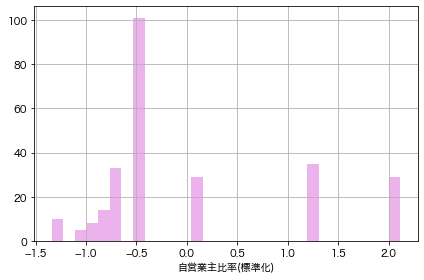

Text(0, 0.5, 'エリア累数')

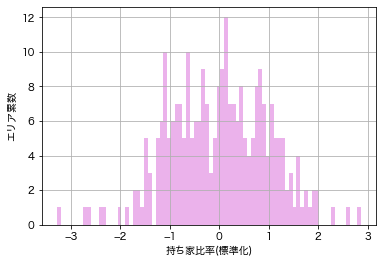

In [86]:
import matplotlib as mpl
import matplotlib.font_manager
mpl.rcParams['font.family'] = 'Hiragino Sans'

fig = plt.figure()
df2['自営業主比率(標準化)'].hist(bins=30,alpha=0.3, histtype='stepfilled', color='m', label='A')
plt.xlabel("自営業主比率(標準化)")
plt.tight_layout() # グラフ同士が重ならないようにする関数
plt.show() # グラフの表示

df2['持ち家比率(標準化)'].hist(bins=80,alpha=0.3, histtype='stepfilled', color='m', label='A')
plt.xlabel("持ち家比率(標準化)")
plt.ylabel("エリア累数")

## クラスタリング

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit(df3)
df2['クラスター番号'] = clusters.labels_
print(df2['クラスター番号'].unique()) # 付与したクラスターの番号を表示
df2.head()

[0 4 1 3 2]


<ipython-input-88-12cfc322a6e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['クラスター番号'] = clusters.labels_


,市区町村名,大字・町名,字・丁目名,45~64才の割合(標準化),65才以上の割合(標準化),1000万以上の割合(標準化),持ち家比率(標準化),自営業主比率(標準化),住所1,クラスター番号
0,品川区,東五反田,1,0.4417,0.783892,-0.627095,-1.497389,-1.339928,東五反田1,0
1,品川区,東五反田,3,0.4417,0.783892,-0.627095,-0.069666,-1.339928,東五反田3,4
2,品川区,東五反田,4,0.4417,0.783892,-0.627095,-0.433105,-1.339928,東五反田4,4
3,品川区,東五反田,5,0.4417,0.783892,-0.627095,0.123956,-1.339928,東五反田5,4
4,品川区,北品川,3,0.4417,0.783892,-0.627095,-1.185894,-1.339928,北品川3,0


In [90]:
#各クラスターごとの特徴
df2.groupby('クラスター番号').mean()

,45~64才の割合(標準化),65才以上の割合(標準化),1000万以上の割合(標準化),持ち家比率(標準化),自営業主比率(標準化)
クラスター番号,,,,,
0,-0.510359,0.480274,-1.017361,-0.794535,-0.687243
1,0.964167,0.620660,2.245355,0.477227,1.275370
2,-1.151952,-1.527899,-0.002271,0.467527,-0.441441
3,1.397184,0.422794,0.063929,-0.109960,2.113237
4,0.524945,0.574721,-0.234684,0.068838,-0.472573


### クラスタリングの可視化

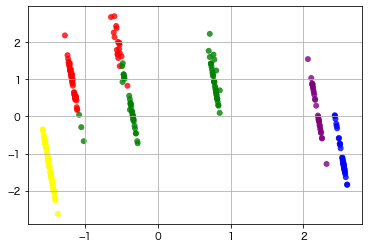

In [81]:
from sklearn.decomposition import PCA
X = df3
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["クラスター番号"] = df2['クラスター番号']

import matplotlib.pyplot as plt
%matplotlib inline
colors = ['red','blue','yellow','purple','green']
for i in df2['クラスター番号'].unique():
    tmp = pca_df.loc[pca_df["クラスター番号"] == i]
    plt.scatter(tmp[0],tmp[1],alpha=0.8, c=colors[i], edgecolors='none')
    plt.grid(True)

# 地図上で色分け

In [24]:
# geopandasをインストール
conda install geopandas 
conda install --channel conda-forge geopandas
pip install geopandas

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               -failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']
  - anaconda-project -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.7,<3.8.0a0|>=3.6,<3.7.0a0']
  - anaconda==2020.11 -> python[version='3.7.9|3.8.5',build='h26836e1_1|h26836e1_0']
  - argon2-cffi -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0'

In [28]:
input_path = "shapefile" # 展開先フォルダ名

# e-stat 国勢調査 小地域（町丁・字等別） 東京都全域
shapefile_url = "https://www.e-stat.go.jp/gis/statmap-search/data?dlserveyId=A002005212015&code=13&coordSys=1&format=shape&downloadType=5"
shapefile_name = "tokyo.zip"

# ダウンロード
from urllib.request import urlretrieve
urlretrieve(url=shapefile_url, filename=shapefile_name)

# 解凍
import zipfile
with zipfile.ZipFile(shapefile_name) as existing_zip:
    existing_zip.extractall(input_path)

# ファイル名を取得
import os
files = os.listdir(input_path)
shapefile = [file for file in files if ".shp" in file][0]
print(f"downloaded shapefile: {shapefile}")

# 読み込み
import geopandas as gpd
shapefile_path = os.path.join(input_path, shapefile)
maps = gpd.read_file(shapefile_path, encoding='cp932')
print(f"{shapefile_path} is loaded")

# 東京都の島嶼部を除く
import pandas as pd
islands = ['大島町', '利島村', '新島村', '神津島村', '三宅村', '御蔵島村', '八丈町', '青ヶ島村', '小笠原村']
is_not_islands = [maps["CITY_NAME"] != island for island in islands]
is_not_islands = pd.concat(is_not_islands, axis=1).all(axis=1)
maps = maps.loc[is_not_islands, :]

# 陸地だけにする
maps = maps.loc[maps["HCODE"] == 8101, :]

# 23区のみに変える
maps = maps[maps['CITY_NAME'].str.contains('区')]

downloaded shapefile: h27ka13.shp
shapefile/h27ka13.shp is loaded


,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,PERIMETER,H27KAxx_,H27KAxx_ID,KEN,KEN_NAME,SITYO_NAME,GST_NAME,CSS_NAME,KIHON1,DUMMY1,KIHON2,KEYCODE1,KEYCODE2,AREA_MAX_F,KIGO_D,N_KEN,N_CITY,KIGO_I,MOJI,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
4,13101001001,13,101,001001,東京都,千代田区,丸の内１丁目,None,8101,379201.719,3249.012,2319,2318,13,東京都,None,千代田区,None,0010,-,01,101001001,101001001,M,None,None,None,None,丸の内１丁目,11,4,4,139.76699,35.68151,0010-01,"POLYGON ((139.76453 35.68164, 139.76351 35.681..."
5,13101001002,13,101,001002,東京都,千代田区,丸の内２丁目,None,8101,142910.016,1512.233,3620,3619,13,東京都,None,千代田区,None,0010,-,02,101001002,101001002,M,None,None,None,None,丸の内２丁目,7,1,1,139.76325,35.68038,0010-02,"POLYGON ((139.76341 35.67795, 139.76227 35.678..."
6,13101001003,13,101,001003,東京都,千代田区,丸の内３丁目,None,8101,125331.807,1528.016,4516,4515,13,東京都,None,千代田区,None,0010,-,03,101001003,101001003,M,None,None,None,None,丸の内３丁目,8,3,3,139.76331,35.67682,0010-03,"POLYGON ((139.76418 35.67547, 139.76366 35.675..."
7,13101002001,13,101,002001,東京都,千代田区,大手町１丁目,None,8101,274877.003,2455.921,1504,1503,13,東京都,None,千代田区,None,0020,-,01,101002001,101002001,M,None,None,None,None,大手町１丁目,9,3,3,139.76382,35.68811,0020-01,"POLYGON ((139.76608 35.68598, 139.76573 35.684..."
8,13101002002,13,101,002002,東京都,千代田区,大手町２丁目,None,8101,175053.877,1731.454,4456,4455,13,東京都,None,千代田区,None,0020,-,02,101002002,101002002,M,None,None,None,None,大手町２丁目,7,2,2,139.76824,35.68626,0020-02,"POLYGON ((139.77081 35.68529, 139.77092 35.685..."


In [54]:
# "S_NAME"列の全角数値を変換
!python3.8 -m pip install --upgrade pip # Gitから日本語変換できるライブラリをインストール
!pip install jaconv
import jaconv
L = []

for i in maps['S_NAME']:
    a = jaconv.z2h(i,digit=True, ascii=True)
    L.append(a)

maps['S_NAME'] = L

In [121]:
# 結合するために新しく結合列を作成する
new = maps['S_NAME'].str.split("丁", n = 1, expand = True)
maps['住所1'] = new[0]

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,PERIMETER,H27KAxx_,H27KAxx_ID,KEN,KEN_NAME,SITYO_NAME,GST_NAME,CSS_NAME,KIHON1,DUMMY1,KIHON2,KEYCODE1,KEYCODE2,AREA_MAX_F,KIGO_D,N_KEN,N_CITY,KIGO_I,MOJI,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry,住所1
4,13101001001,13,101,001001,東京都,千代田区,丸の内1丁目,None,8101,379201.719,3249.012,2319,2318,13,東京都,None,千代田区,None,0010,-,01,101001001,101001001,M,None,None,None,None,丸の内１丁目,11,4,4,139.76699,35.68151,0010-01,"POLYGON ((139.76453 35.68164, 139.76351 35.681...",丸の内1
5,13101001002,13,101,001002,東京都,千代田区,丸の内2丁目,None,8101,142910.016,1512.233,3620,3619,13,東京都,None,千代田区,None,0010,-,02,101001002,101001002,M,None,None,None,None,丸の内２丁目,7,1,1,139.76325,35.68038,0010-02,"POLYGON ((139.76341 35.67795, 139.76227 35.678...",丸の内2
6,13101001003,13,101,001003,東京都,千代田区,丸の内3丁目,None,8101,125331.807,1528.016,4516,4515,13,東京都,None,千代田区,None,0010,-,03,101001003,101001003,M,None,None,None,None,丸の内３丁目,8,3,3,139.76331,35.67682,0010-03,"POLYGON ((139.76418 35.67547, 139.76366 35.675...",丸の内3
7,13101002001,13,101,002001,東京都,千代田区,大手町1丁目,None,8101,274877.003,2455.921,1504,1503,13,東京都,None,千代田区,None,0020,-,01,101002001,101002001,M,None,None,None,None,大手町１丁目,9,3,3,139.76382,35.68811,0020-01,"POLYGON ((139.76608 35.68598, 139.76573 35.684...",大手町1
8,13101002002,13,101,002002,東京都,千代田区,大手町2丁目,None,8101,175053.877,1731.454,4456,4455,13,東京都,None,千代田区,None,0020,-,02,101002002,101002002,M,None,None,None,None,大手町２丁目,7,2,2,139.76824,35.68626,0020-02,"POLYGON ((139.77081 35.68529, 139.77092 35.685...",大手町2


### 2つのデータフレームを結合

In [97]:
df4 = df2[['住所1','クラスター番号']]

In [119]:
df5 = pd.merge(maps, df4, on='住所1', how='left')
df5['クラスター番号'].fillna(-1,inplace=True)

<AxesSubplot:>

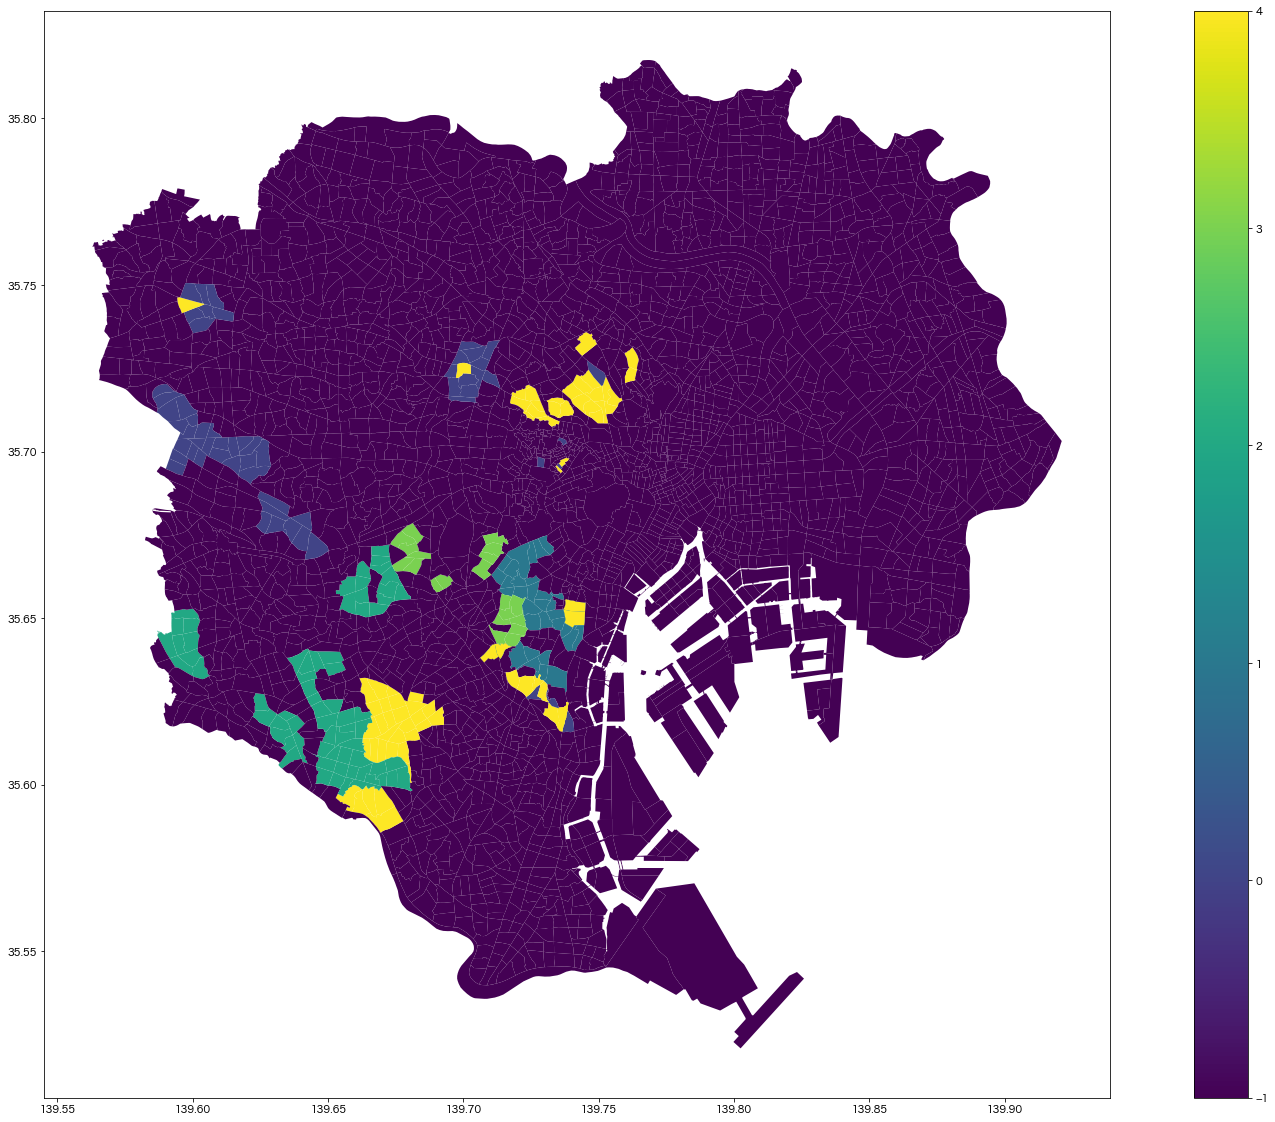

In [133]:
df5.plot(column= "クラスター番号", legend=True, figsize=[30,20], cmap='viridis') #色が優劣を示すものではない

### 値のラベルをつけた図

<ipython-input-131-f8e769bd1c0b>:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=round(row["クラスター番号"], 2), xy=row["coords"], horizontalalignment="center")


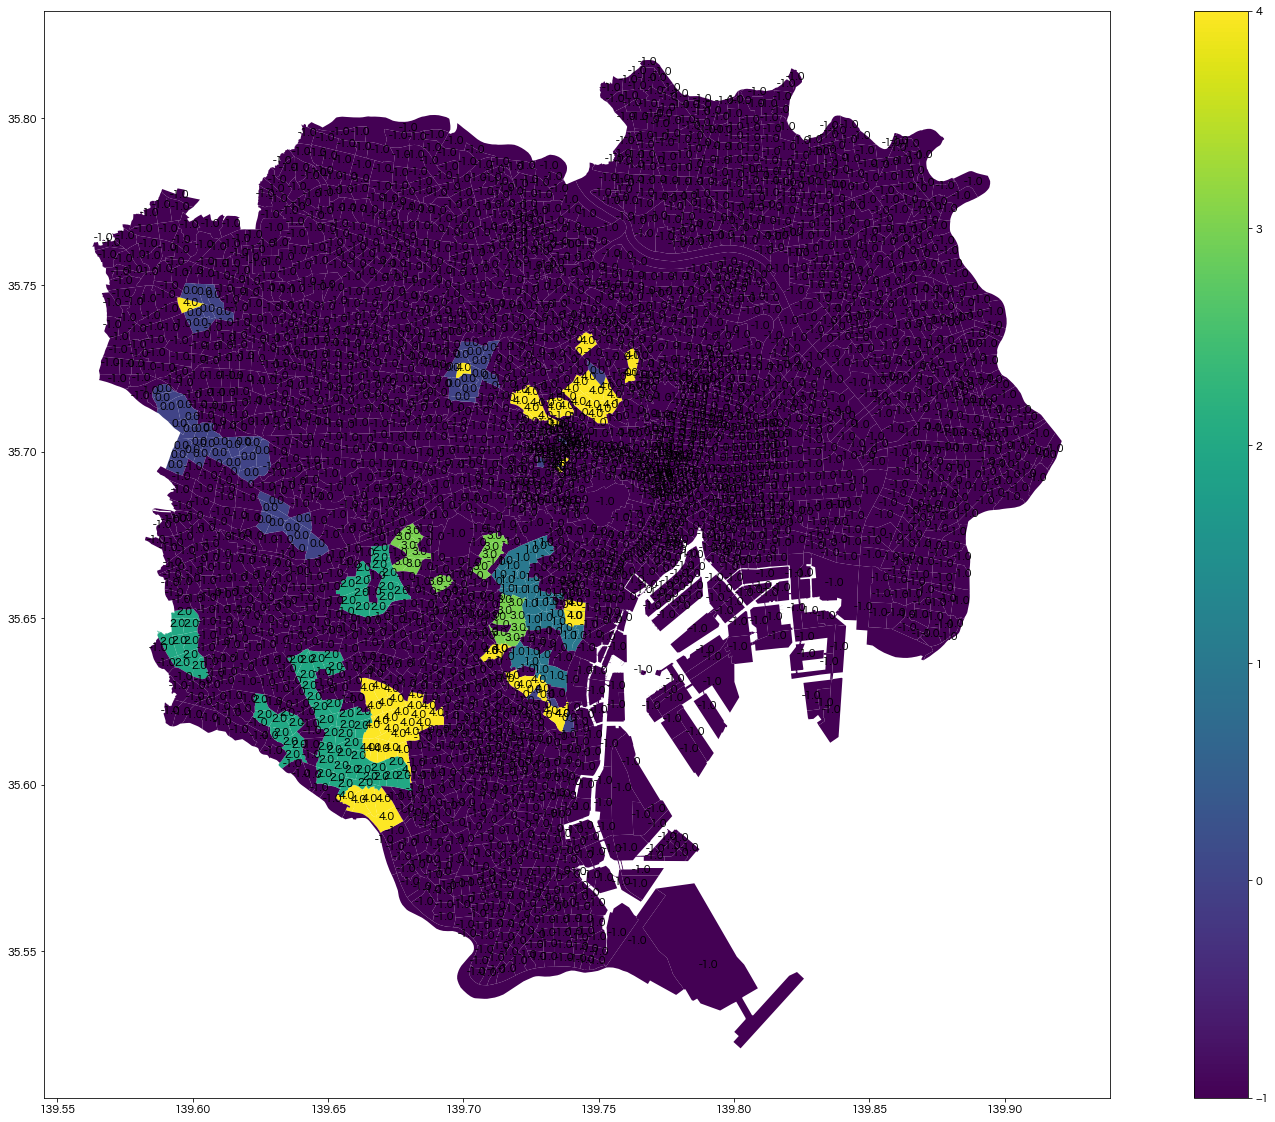

In [131]:
# 値ラベル用にgeometryから当該ポリゴン内のある地点を取得
df5["coords"] = df5["geometry"].apply(lambda x: x.representative_point().coords[:])
df5["coords"] = [coords[0] for coords in df5["coords"]]

df5.plot(column= "クラスター番号", legend=True, figsize=[30,20], cmap='viridis')

# 値ラベル
import matplotlib.pyplot as plt
for i, row in df5.iterrows():
    plt.annotate(s=round(row["クラスター番号"], 2), xy=row["coords"], horizontalalignment="center")

In [37]:
#new.to_excel('aa.xlsx')